In [1]:
!pip install --upgrade pip
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## generate all data needed ## 
unemployment = pd.read_csv('clean_unemployment.csv')
salaries = pd.read_csv('ds_salaries_clean.csv')
books = pd.read_csv('clean_books.csv')
divorce = pd.read_csv('divorce.csv')
planes = pd.read_csv('planes.csv')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Intial Exploration 
- Exploratory Data Analysis = EDA
  - derive insights
  - generate hypotheses
  - how?
    1. initial look : .head()
    2. gathering more : .info()
    3. categorical value count : .value_counts()
    4. numerical columns info : .describe()
  - validating data types
    1. .dtypes
    2. change data types using .astype
    3. str, int, float, dict, list, bool
  - validating categorical data
    1. .isin
    2. ~ >> tilde work as not
  - validating numerical data
    1. .select_dtypes("number").
    2. .min(), .max()
  - Data summarization
    1. .groupby()
    2. aggregating function indicates how to summarize grouped data : .sum(), .min(), .max(), .var(), .std() , .count()
    3. .agg([]) >> you can use dictionary here:
       - agg({'rating':["mean","std"], "year":["median"]})
       - you can named summary columns
         - books.groupby('genre').agg(mean_rating=('rating','mean'),std_rating=('rating','std'))
  - Visualizing categorical data
    1. sns.barplot()
   
# Addressing missing data 
- why a problem?
  1. Affects distributions
  2. Less representative of the population
  3. Can result in drawing incorrect conclusions
      - salaries.isna().sum()
- strategies for addressing missing data
  1. drop missing values - 5% or less of total values
     - threshold = len(salaries) *0.05 >> limit 30
     - cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
     - salaries.dropna(subset= cols_to_drop,inplace = True)
  3. input mean, median, mode - depens on distribution and context
     - cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
     - for i in cols_with_missing_values:
          - salaries[col].fillna(salaries[col].mode()[0])
  5. input by sub-group - e.g different salary based on position
     - salaries_dict = salaries.groupby('Experience')['salary'].median().to_dict()
     - salaries['salary']=salaries['salary'].fillna(salaries['experience'.map(salaries_dict))

# Converting and Analyzing Categorical Data 
- .select_dtypes('number'/'object') >> depend which data you want to check
- .nunique() >> to check unique number for each category,, the number not the value if you wanna check the value you need to use .unique()
  
- Extracting value from categories: 
  1. pandas.Series.str.contains() -- search a column for a specific string or multiple strings 
  2. multiple phrases in strings you can use "|"
     - e.g "Machine Learning" or "AI": salaries['Designation'].str.contains("Machine Learning|AI")>> please no space between 2 words 
     - any word start with data then salaries['Designation'].str.contains("^Data")
  3. Creating the categorical column
     - create the conditon
     - np.select(condition, default = "others")

# Working with Numeric Data 
- remove comma values in currency
- convert the column to float data type
- new column converting the currency
  - pd.Series.str.replace('characters to replace', 'characters to replace them with')
  - pd.Series.astype(float)
  - groupby >> mean()
- Adding summary statistics into a Dataframe >> not a summary using groupby
  - e.g: salaries['std_dev'] = salaries.groupby('Experience')['Salary_USD'].transform(lambda x:x.std())
- backslash if you want to enter the code within the same code sentence to avoid long and complicated code 

# Handling an outlier 
- .describe()
- how?
  - IQR = 75th - 25th
  - Upper Outliers >75th percentile+(1.5*IQR)
  - Lower Outliers <25th percentile-(1.5*IQR)
  - e.g 75th percentile >> seventy_fifth = salaries['Salary'].quantile(0.75) 
  - define the threshold
    - upper threshold, lower threshold
    - subsetting our data
- Why look for outliers?
  1. Outliers ae extreme values : may not accurately represent our data
  2. Can change the mean and standard deviation
  3. Statistical tests and machine learning models need normally distributed data
- What to do?
  1. Why do these outliers exist? dependon geographical or demography, if make sense leave the data in dataset
  2. Is the data accurate? could there have been an error, if yes, you can remove the data from dataset

# Patterns overtime 
- datetime in python usually will be read as string/object
- you can change it by:
  1. pd.read_csv('data',parse_dates=['datetime']
  2. pd.to_datetime(df['column'])
- Creating datetime data combined several column in df
  - pd.to_datetime(df[['month','day','year']])
  - extract date using dt.month, dt.day, dt.year
- Visualizing using line plot

# Correlation 
- Describes direction and strength of relationship between two variables
- Can help us use variables to predict future outcomes
- .corr() >> calculate Pearson correlation coefficient, measuring linear relationship 
- correlation heatmaps
  - sns.heatmap(divorce.corr(), annot=True)>> annot =True == labeling inside box 
  - plt.show()
- Should visualizing correlation between all variable! because not all variable will look linear, and correlation coefficient only worked for linear relationship. sometimes it can be quadratic
- sns.pairplot(data=divorce) >> glance of relationship between variable in data
- sns.pairplot(data=divorce,vars=['income_man','income_woman','marriage_duration']

# Factor relationshps and distributions 
- Kernel Density Estimate(KDE) plots >> much better than histogram, especially to show multiple relationship
  - sns.kdeplot(data=divorce, x = 'marriage_duration', hue='education_man', cut=0) >> cut how minimum or maximum data could go , if interested to cumulative we can set cumulative argument to True 
  - plt.show()

# Can’t onsiderations for categorical data 
- Why perform EDA?
  - detecting patterns and relationships
  - Generating questions or hypotheses
  - preparing data for machine learning
- what to think about the data:
  1. data sample must be representative of the whole population
     - eg. education vs income in USA can't use France data
  2. make sure the class/label not imbalance, let's say you wanna take survey people's attitudes towards marriage then you need to make sample not skewed into divorce people
  4. relative class frequency, see the trend of whole population, let's say you know information that 40% of internal indian flights have a destination of Delhi, and you have sample of data and count it turns out it's not represent whole society. you can use >>
     - count class frequency using .value_counts(normalize=True) >> in percentage already
     - cross-tabulation
       pd.crosstab(planes['Source'],planes['Destination'], values=planes['Price'], aggfunc='median')
  6. Comparing sample to population using summary statistics median or avg 

In [2]:
# Print the first five rows of unemployment
print(unemployment.head())
print(unemployment.info())
print(unemployment.describe())

  country_code          country_name      continent   2010   2011   2012   
0          AFG           Afghanistan           Asia  11.35  11.05  11.34  \
1          AGO                Angola         Africa   9.43   7.36   7.35   
2          ALB               Albania         Europe  14.09  13.48  13.38   
3          ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4          ARG             Argentina  South America   7.71   7.18   7.22   

    2013   2014   2015   2016   2017   2018   2019   2020   2021  
0  11.19  11.14  11.13  11.16  11.18  11.15  11.22  11.71  13.28  
1   7.37   7.37   7.39   7.41   7.41   7.42   7.42   8.33   8.53  
2  15.87  18.05  17.19  15.42  13.62  12.30  11.47  13.33  11.82  
3   2.04   1.91   1.77   1.64   2.46   2.35   2.23   3.19   3.36  
4   7.10   7.27   7.52   8.11   8.35   9.22   9.84  11.46  10.90  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 15 columns):
 #   Column        Non-Null Count  D

In [3]:
# Count the values associated with each continent in unemployment
print(unemployment['continent'].value_counts())

continent
Africa           53
Asia             47
Europe           39
North America    18
South America    12
Oceania           8
Name: count, dtype: int64


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


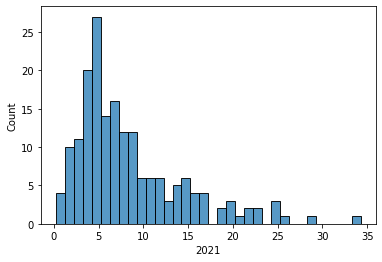

In [4]:
# Import the required visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
!pip3 install seaborn --upgrade

# Create a histogram of 2021 unemployment; show a full percent in each bin
sns.histplot(x='2021',data=unemployment, binwidth = 1)
plt.show()


In [5]:
# Update the data type of the 2019 column to a float
unemployment["2019"] = unemployment["2019"].astype('float')
unemployment["2019"].astype('float')
# Print the dtypes to check your work
print(unemployment.dtypes)

country_code     object
country_name     object
continent        object
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object


In [6]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment['continent'].isin(['Oceania'])
# unemployment[unemployment.index !=not_oceania]
unemployment[not_oceania]


,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,VNM,Vietnam,Asia,1.11,1.00,1.03,1.32,1.26,1.85,1.85,1.87,1.16,2.04,2.39,2.17
178,YEM,"Yemen, Rep.",Asia,12.83,13.23,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
179,ZAF,South Africa,Africa,24.68,24.64,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
180,ZMB,Zambia,Africa,13.19,10.55,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [7]:
# Define a Series describing whether each continent is outside of Oceania
not_oceania = ~unemployment["continent"].isin(["Oceania"])

# Print unemployment without records related to countries in Oceania
print(unemployment[not_oceania])


    country_code          country_name      continent   2010   2011   2012   
0            AFG           Afghanistan           Asia  11.35  11.05  11.34  \
1            AGO                Angola         Africa   9.43   7.36   7.35   
2            ALB               Albania         Europe  14.09  13.48  13.38   
3            ARE  United Arab Emirates           Asia   2.48   2.30   2.18   
4            ARG             Argentina  South America   7.71   7.18   7.22   
..           ...                   ...            ...    ...    ...    ...   
175          VNM               Vietnam           Asia   1.11   1.00   1.03   
178          YEM           Yemen, Rep.           Asia  12.83  13.23  13.17   
179          ZAF          South Africa         Africa  24.68  24.64  24.73   
180          ZMB                Zambia         Africa  13.19  10.55   7.85   
181          ZWE              Zimbabwe         Africa   5.21   5.37   5.15   

      2013   2014   2015   2016   2017   2018   2019   2020   2

In [8]:
unemployment.head()


,country_code,country_name,continent,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,Afghanistan,Asia,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
1,AGO,Angola,Africa,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
2,ALB,Albania,Europe,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
3,ARE,United Arab Emirates,Asia,2.48,2.30,2.18,2.04,1.91,1.77,1.64,2.46,2.35,2.23,3.19,3.36
4,ARG,Argentina,South America,7.71,7.18,7.22,7.10,7.27,7.52,8.11,8.35,9.22,9.84,11.46,10.90


0.26 33.56


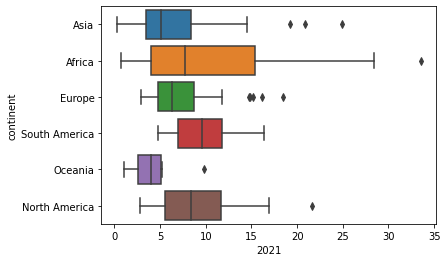

In [9]:
# Print the minimum and maximum unemployment rates during 2021
print(unemployment['2021'].min(), unemployment['2021'].max())

# Create a boxplot of 2021 unemployment rates, broken down by continent
sns.boxplot(x='2021', y = 'continent', data = unemployment)
plt.show()

In [10]:
# Print the mean and standard deviation of rates by year
print(unemployment.mean(numeric_only=True))
print(unemployment.std(numeric_only=True))

2010    8.409286
2011    8.315440
2012    8.317967
2013    8.344780
2014    8.179670
2015    8.058901
2016    7.925879
2017    7.668626
2018    7.426429
2019    7.243736
2020    8.420934
2021    8.390879
dtype: float64
2010    6.248887
2011    6.266795
2012    6.367270
2013    6.416041
2014    6.284241
2015    6.161170
2016    6.045439
2017    5.902152
2018    5.818915
2019    5.696573
2020    6.040915
2021    6.067192
dtype: float64


In [11]:
# Print yearly mean and standard deviation grouped by continent
print(unemployment.groupby('continent').mean(numeric_only=True))
print(unemployment.groupby('continent').std(numeric_only=True))

                    2010       2011       2012       2013       2014   
continent                                                              
Africa          9.343585   9.369245   9.240755   9.132453   9.121321  \
Asia            6.240638   5.942128   5.835319   5.852128   5.853191   
Europe         11.008205  10.947949  11.325641  11.466667  10.971282   
North America   8.663333   8.563333   8.448889   8.840556   8.512222   
Oceania         3.622500   3.647500   4.103750   3.980000   3.976250   
South America   6.870833   6.518333   6.410833   6.335000   6.347500   

                    2015      2016      2017      2018      2019       2020   
continent                                                                     
Africa          9.222075  9.277547  9.284528  9.237925  9.264340  10.307736  \
Asia            5.967447  6.094894  6.171277  6.090213  5.949149   7.012340   
Europe         10.301282  9.394615  8.359744  7.427436  6.764359   7.470513   
North America   8.098889  7.

In [15]:
continent_summary = unemployment.groupby("continent").agg(
    # Create the mean_rate_2021 column
    mean_rate_2021 = ('2021','mean'),
    # Create the std_rate_2021 column
    std_rate_2021 = ('2021','std') 
)
print(continent_summary)

continent_summary_2 = unemployment.groupby("continent").mean(numeric_only=True)
print(continent_summary_2)

               mean_rate_2021  std_rate_2021
continent                                   
Africa              10.473585       8.131636
Asia                 6.906170       5.414745
Europe               7.414872       3.947825
North America        9.155000       5.076482
Oceania              4.280000       2.671522
South America        9.924167       3.611624
                    2010       2011       2012       2013       2014   
continent                                                              
Africa          9.343585   9.369245   9.240755   9.132453   9.121321  \
Asia            6.240638   5.942128   5.835319   5.852128   5.853191   
Europe         11.008205  10.947949  11.325641  11.466667  10.971282   
North America   8.663333   8.563333   8.448889   8.840556   8.512222   
Oceania         3.622500   3.647500   4.103750   3.980000   3.976250   
South America   6.870833   6.518333   6.410833   6.335000   6.347500   

                    2015      2016      2017      2018      201

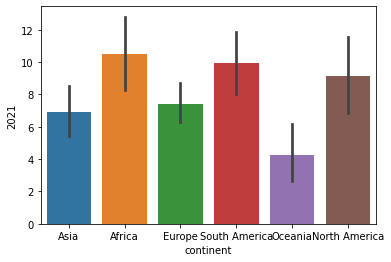

In [16]:
# Create a bar plot of continents and their average unemployment
sns.barplot(x='continent', y = '2021', data=unemployment)
plt.show()

In [17]:
# Count the number of missing values in each column
print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


In [18]:
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64
Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64


In [19]:
planes.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0


Additional_Info
No info                         6399
In-flight meal not included     1525
No check-in baggage included     258
1 Long layover                    14
Change airports                    7
No Info                            2
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64


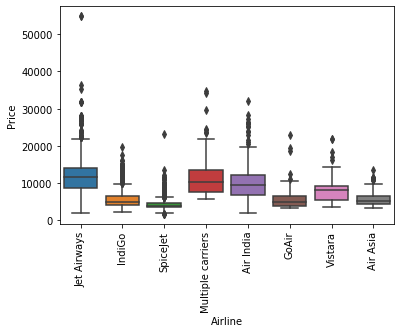

In [20]:
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')
plt.xticks(rotation = 90)

plt.show()

In [21]:
planes.isna().sum()

Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

In [22]:
planes.drop(['Additional_Info'],axis=1, inplace = True)

In [23]:
airlines_median = planes.groupby('Airline')['Price'].median().to_dict()
# map the data 
planes['Price']=planes['Price'].fillna(planes['Airline'].map(airlines_median))
planes.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [24]:
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes("object")

# Loop through columns
for i in non_numeric.columns:
    # Print the number of unique values
    print(f"Number of unique values in {i} column: ", non_numeric[i].nunique())

Number of unique values in Airline column:  8
Number of unique values in Date_of_Journey column:  44
Number of unique values in Source column:  5
Number of unique values in Destination column:  6
Number of unique values in Route column:  122
Number of unique values in Dep_Time column:  218
Number of unique values in Arrival_Time column:  1220
Number of unique values in Duration column:  362
Number of unique values in Total_Stops column:  5


In [25]:
# Create a list of categories
flight_categories = ['Short-haul','Medium','Long-haul']

planes["Duration"].head()

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

In [26]:
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short_flights
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium_flights
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long_flights
long_flights = "10h|11h|12h|13h|14h|15h|16h"

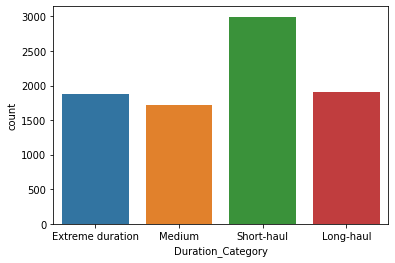

In [27]:
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [28]:
planes['Total_Stops'].unique()
total_stops_category = ['Direct','1 or 2','3 or 4']

direct = "non-stop"
less_2 = "^1|^2"
less_4 = "^3|^4"

## condition ## 
conditions = [
    planes['Total_Stops'].str.contains(direct),
    planes['Total_Stops'].str.contains(less_2),
    planes['Total_Stops'].str.contains(less_4)
]
## map into new column 

planes['Total_stops_category']= np.select(conditions,total_stops_category, default = "Lots of stops")

planes.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Duration_Category,Total_stops_category
0,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882.0,Extreme duration,1 or 2
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218.0,Medium,1 or 2
2,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302.0,Short-haul,1 or 2
3,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,3873.0,Short-haul,Direct
4,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,11087.0,Long-haul,1 or 2


0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object


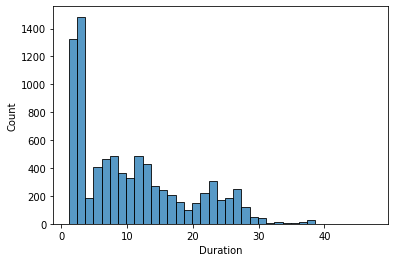

In [29]:
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].str.replace(" ", ".")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duration', data=planes)
plt.show()

In [30]:
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

Airline            airline_price_st_dev
Jet Airways        4159.846432             3082
IndiGo             2245.529140             1632
Air India          3692.609285             1399
Multiple carriers  3558.323763              959
SpiceJet           1798.900648              653
Vistara            2888.915498              376
Air Asia           1979.826234              260
GoAir              2764.926625              147
Name: count, dtype: int64


In [31]:
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

Airline            airline_median_duration
Jet Airways        13.20                      3082
IndiGo             2.55                       1632
Air India          15.50                      1399
Multiple carriers  10.15                       959
SpiceJet           2.30                        653
Vistara            3.10                        376
Air Asia           2.50                        260
GoAir              2.55                        147
Name: count, dtype: int64


In [32]:
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

Destination  price_destination_mean
Cochin       10473.585927              3631
Banglore     9093.622872               2291
Delhi        5248.541082                998
New Delhi    11579.306944               720
Hyderabad    5190.274021                562
Kolkata      4907.156863                306
Name: count, dtype: int64


In [33]:
planes.groupby("Destination")["Price"].mean()

Destination
Banglore      9093.622872
Cochin       10473.585927
Delhi         5248.541082
Hyderabad     5190.274021
Kolkata       4907.156863
New Delhi    11579.306944
Name: Price, dtype: float64

In [35]:
# subsetting data 
planes[(planes['Airline']=='Jet Airways')|(planes['Airline']=='IndiGo')]\
[['Airline','Date_of_Journey']]


,Airline,Date_of_Journey
0,Jet Airways,9/06/2019
1,IndiGo,12/05/2019
2,IndiGo,01/03/2019
4,Jet Airways,12/03/2019
5,Jet Airways,01/03/2019
...,...,...
10644,Jet Airways,12/03/2019
10645,Jet Airways,9/05/2019
10649,Jet Airways,27/06/2019
10650,Jet Airways,27/05/2019


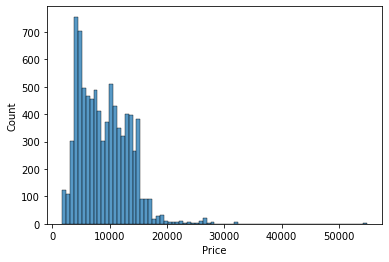

In [36]:
# Plot a histogram of flight prices
sns.histplot(x='Price', data=planes)
plt.show()

In [37]:
# 1.5*(15.500-2.833)
12373+1.5*(12373-5276)

23018.5

In [38]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)
# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

In [39]:
# Find the 75th and 25th percentiles
price_seventy_fifth = planes["Price"].quantile(0.75)
price_twenty_fifth = planes["Price"].quantile(0.25)

# Calculate iqr
prices_iqr = price_seventy_fifth - price_twenty_fifth

# Calculate the thresholds
upper = price_seventy_fifth + (1.5 * prices_iqr)
lower = price_twenty_fifth - (1.5 * prices_iqr)

# Subset the data
planes = planes[(planes["Price"] > lower) & (planes["Price"] < upper)]

print(planes["Price"].describe())

count     8438.000000
mean      8877.466046
std       4001.838236
min       1759.000000
25%       5224.000000
50%       8372.000000
75%      12121.000000
max      22270.000000
Name: Price, dtype: float64


In [40]:
# Import divorce.csv, parsing the appropriate columns as dates in the import
divorce = pd.read_csv('divorce.csv', parse_dates = ['divorce_date','dob_man','dob_woman','marriage_date'])
print(divorce.dtypes)

divorce_date         datetime64[ns]
dob_man              datetime64[ns]
education_man                object
income_man                  float64
dob_woman            datetime64[ns]
education_woman              object
income_woman                float64
marriage_date        datetime64[ns]
marriage_duration           float64
num_kids                    float64
dtype: object


In [41]:
# Define the marriage_year column
divorce["marriage_year"] = divorce['marriage_date'].dt.year

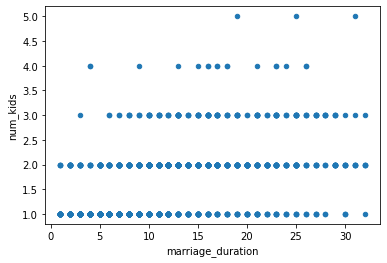

In [42]:
# Create a line plot showing the average number of kids by year
# !pip install matplotlib --upgrade
# Create a line plot showing the average number of kids by year
divorce.plot(x='marriage_duration',y='num_kids',kind = 'scatter')
plt.show()

/Users/tiatitisari/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


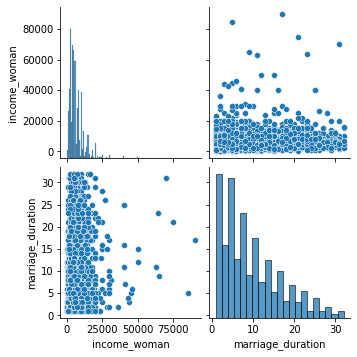

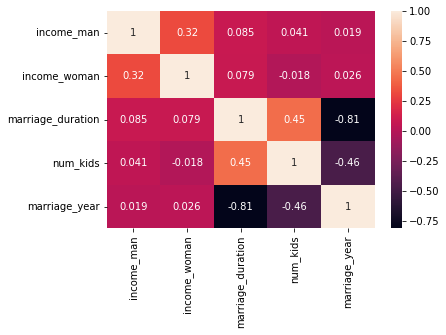

In [43]:
# Create a pairplot for income_woman and marriage_duration
sns.pairplot( data=divorce, vars =['income_woman','marriage_duration'])
plt.show()

sns.heatmap(divorce.select_dtypes('number').corr(), annot=True)
plt.show()


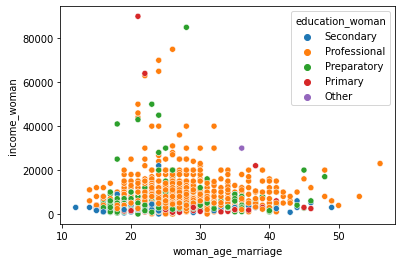

In [44]:
divorce['woman_age_marriage']=divorce['marriage_date'].dt.year-\
divorce['dob_woman'].dt.year
#Create the scatter plot
sns.scatterplot(x='woman_age_marriage', y = 'income_woman', data=divorce, hue='education_woman')
plt.show()

In [45]:
## if you find a problem within IDE then you need to make sure the version for\
# pip you have
# check library version 
print(pd.__version__)
print(sns.__version__)

# reinstall and install 
# !pip uninstall pandas 
# !pip install pandas == 2.0.0 ## - by version 

2.0.0
0.12.2


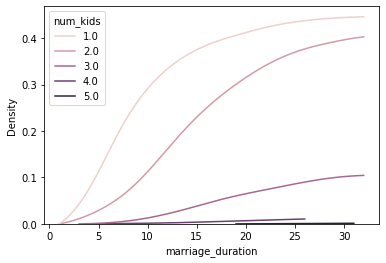

In [46]:
import matplotlib.pyplot as plt 
import seaborn as sns 
# Create the KDE plot
sns.kdeplot(x='marriage_duration',data=divorce,hue='num_kids', cut=0, cumulative=True)
plt.show()

In [47]:
# Print the relative frequency of Job_Category
# Making Job Category 
Job_Category = ['Data Analytics', 'Data Engineering', 'Data Science', 'Machine Learning']

Conditions = [
    (salaries['Designation'].str.contains('Analytics|Analyst')),
    (salaries['Designation'].str.contains('Engineer|ETL|Architect')),
    (salaries['Designation'].str.contains('Data Scientist|NLP Engineer')),
    (salaries['Designation'].str.contains('Data Learning|^ML|^AI'))
]
salaries['Job_Category']=np.select(Conditions,Job_Category, default='Others')
print(salaries['Job_Category'].value_counts(normalize=True))


Job_Category
Data Engineering    0.388797
Data Science        0.261944
Data Analytics      0.222405
Others              0.115321
Machine Learning    0.011532
Name: proportion, dtype: float64


In [48]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"]))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22


In [49]:
# compare with pivot 
salaries.pivot_table(aggfunc=['count'],index='Company_Size', columns='Experience')

count                                                        
             Designation                      Employee_Location                 
Experience         Entry Executive Mid Senior             Entry Executive Mid   
Company_Size                                                                    
L                     29        11  86     72                29        11  86  \
M                     30        12  98    186                30        12  98   
S                     29         3  29     22                29         3  29   

                                                 ...                        
                    Employment_Status            ... Remote_Working_Ratio   
Experience   Senior             Entry Executive  ...                  Mid   
Company_Size                                     ...                        
L                72                29        11  ...                   86  \
M               186                30        12  ...                   98   
S                22                29         3  ...                   29   

                                                                             
                    Salary_USD                      Working_Year             
Experience   Senior      Entry Executive Mid Senior        Entry Executive   
Company_Size                                                                 
L                72         29        11  86     72           29        11  \
M               186         30        12  98    186           30        12   
S                22         29         3  29     22           29         3   

                         
                         
Experience   Mid Senior  
Company_Size             
L             86     72  
M             98    186  
S             29     22  

[3 rows x 28 columns]

In [50]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))

Company_Size       L    M   S
Job_Category                 
Data Analytics    32   91  12
Data Engineering  72  130  34
Data Science      55   81  23
Machine Learning   2    2   3
Others            37   22  11


In [51]:
# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))
salaries

Company_Size                  L              M             S
Job_Category                                                
Data Analytics    102997.125000   98125.835165  43074.500000
Data Engineering  109196.444444  113682.684615  84123.470588
Data Science      109180.054545  121664.888889  70426.869565
Machine Learning  121741.500000   63019.000000  24173.000000
Others            138846.054054  122761.954545  98459.545455


,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Science
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Others
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Data Analytics
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Data Engineering
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0,Data Engineering
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0,Data Engineering
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0,Data Analytics
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0,Data Analytics


# Generating new features 
- Correlation .corr()
- Extracting month and weekday >> dt.day, dt.month, dt.year, dt.weekday, dt.hour
- Creating category using descriptive statistics
  - .quantile(0.25,0.75,0.5)
  - .median()
  - .mean()
  - .max()
  - .min()
  - using pd.cut()
    - e.g planes['Price_Category']=pd.cut(planes['Price'],labels=labels,bins=bins)
    - labels =['Economy', 'Premium Economy', 'Business', 'First Class']
    - bins = [0,twenty_fifth, median, seventy_fifth, maximum]
    - twenty fifth = planes['Price'].quantile(0.25) and so on 

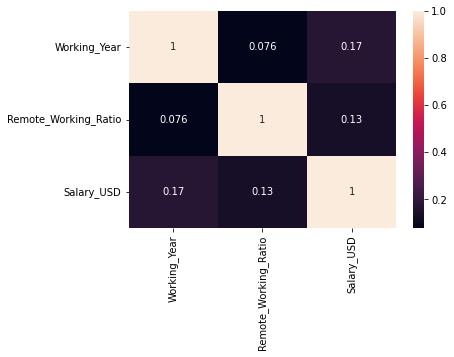

In [52]:

# ## Get the month of the response
# salaries["month"] = salaries["date_of_response"].dt.month

# ## Extract the weekday of the response
# salaries["weekday"] = salaries["date_of_response"].dt.weekday

# ## Create a heatmap
sns.heatmap(salaries.select_dtypes('number').corr(), annot=True)
plt.show()

59893.0 96982.0 143225.0


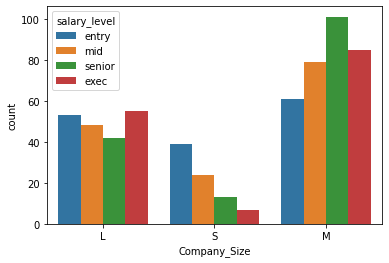

In [53]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries['Salary_USD'].quantile(0.75)
print(twenty_fifth, salaries_median, seventy_fifth)

# Create salary labels
salary_labels = ['entry','mid','senior','exec']

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level")
plt.show()

# Generating Hypotheses 
- would data from a different time give the same results
- detecting relationships, differences, and patterns:
  - We use Hypothesis Testing
  - Hypothesis testing requires, prior to data collection:
    - Generating a hypothesis or question
    - A decision on what statistical test to use
    - Create a bar plot
    - Design our experiments:
      - Choosing a sample
      - Calculating how many data points we need
      - Deciding what statistical test to run 

<ipython-input-54-eec6e8c4d4d9>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD", ci=None)


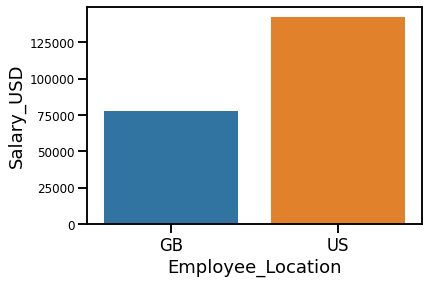

In [54]:
sns.set_context('talk')

# Filter for employees in the US or GB
usa_and_gb = salaries[salaries["Employee_Location"].isin(["US", "GB"])]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD", ci=None)
plt.yticks(size=12)
plt.show()

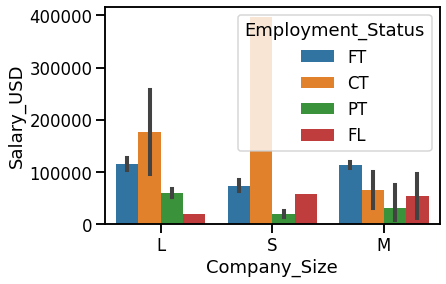

In [55]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, y="Salary_USD", x="Company_Size", hue="Employment_Status")
plt.show()

# Introduction to Exploratory Data Analysis 
- The goal of statistical inference :
  1. to draw probabilistic conclusions about what we might expect if we collected the same data again
  2. to draw actionable conclusions from data
  3. to draw more general conclusions from relatively few data or observations

# Plotting a histogram 
1. matplotlib 
- import matplotlib.pyplot as plt
- plt.hist(df_swing['dem_share'])
- plt.xlabel('percent of vote')
- plt.ylabel('number of counties')
- plt.show()
- always label your axes
2. seaborn
- import seaborn as sns
- sns.set()
- plt.hist(df_swing['dem_share'])
- plt.xlabel('percent of vote')
- plt.ylabel('number of counties')
- plt.show()

In [57]:
import sklearn
import numpy as np 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt 
import seaborn as sns 
np.int = np.int_

versicolor_petal_length= load_iris().data

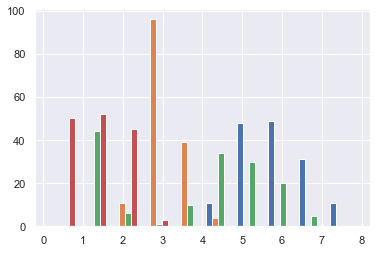

In [59]:

# Import plotting modules
import matplotlib.pyplot as plt 
import seaborn as sns 


# Set default Seaborn style
sns.set() 

# Plot histogram of versicolor petal lengths
plt.hist(versicolor_petal_length)


# Show histogram
plt.show()



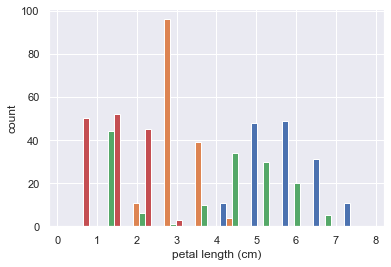

In [60]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()



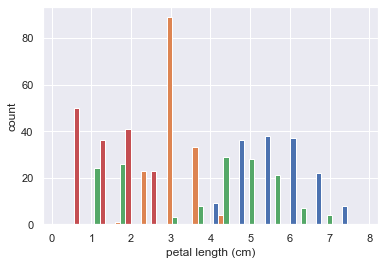

In [51]:
# Import numpy
import numpy as np 

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = n_bins.astype('int')


# Plot the histogram
plt.hist(versicolor_petal_length,bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

# Plot all of your data : Bee Swarm plots 
- Binning bias : the same data may be interpreted differently depending on choice of bins
- Bee swarm plots:
  1. sns.swarmplot(x='state', y='dem_share', data=df_swing)
  2. plt.xlabel()
  3. plt.ylabel()
  4. plt.show()


In [106]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

X, y = load_iris(as_frame=True, return_X_y=True)
df = pd.DataFrame(X).reset_index()
data = load_iris()
data.target[[0,149,1]]
# list(data.target_names)
# ['setosa', 'versicolor', 'virginica']
index_25 = np.quantile(df['index'],0.25) 
index_50 = np.quantile(df['index'],0.50) 
index_75 = np.quantile(df['index'],0.75)

list = ['setosa', 'versicolor', 'virginica']
bins = [0,index_25, index_50, index_75]
df['species'] = pd.cut(df['index'],labels=list, bins=bins).fillna('setosa')

,index,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,setosa
146,146,6.3,2.5,5.0,1.9,setosa
147,147,6.5,3.0,5.2,2.0,setosa
148,148,6.2,3.4,5.4,2.3,setosa


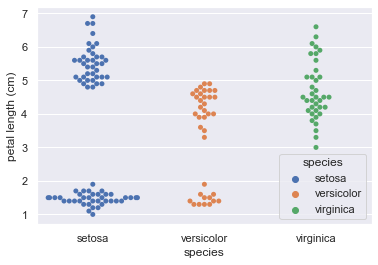

In [108]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x='species', y= 'petal length (cm)',data=df,hue='species')

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


# Plot all of your data : ECDF's 
- empirical cumulative distribution function (ECDF) 
  1. import numpy as np
  2. x=np.sort(df_swing['dem_share'])
  3. y=np.arange(1,len(x)+1)/len(x))
  4. plt.plot(x,y,marker = '.', linestyle = 'none')
  5. plt.xlabel('percent of vote for obama')
  6. plt.ylabel('ecdf')
  7. plt.margins(0.02) # keeps data off plot edges
  8. plt.show() 

In [109]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n

    return x, y


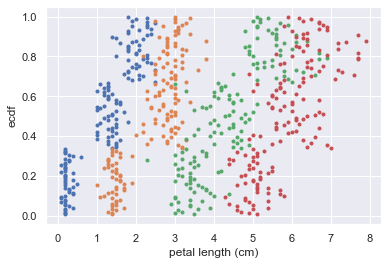

In [113]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers,y_vers,marker='.',linestyle='none')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('ecdf')

# Display the plot
plt.show()


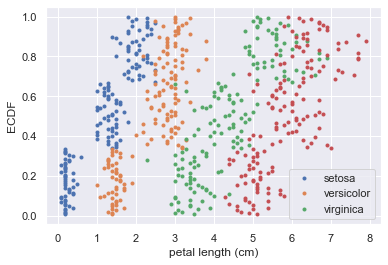

In [118]:
# Compute ECDFs
# x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
# x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
# plt.plot(x_set, y_set, marker = '.', linestyle='none')
plt.plot(x_vers, y_vers, marker = '.', linestyle='none')
# plt.plot(x_virg, y_virg, marker = '.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


# Onward toward the whole story! 
- exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone
- Introduction to summary statistics:
  1. sample mean and median
  2. np.mean(), np.median()
- percentiles, outliers, and box plots:
  1. np.percentile(df_swing['dem_share'],[25,50,75])
  2. sns.boxplot(x,y,data)
- Variance and Standard Deviation
  1. the mean squared distance of the data from their mean
  2. informally, a measure of the spread of data
- Covariance and the Pearson correlation coefficient
  1. a measure of how two quantities vary together
  2. covariance/(std of x)(std of y) == pearson correlation

In [119]:
# Compute the mean: mean_length_vers
mean_length_vers=np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 3.4644999999999997 cm


In [124]:
# Specify array of percentiles: percentiles
percentiles=np.array([2.5,25,50,75,97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length,percentiles)

ptiles_vers_2 = np.quantile(versicolor_petal_length,[0.25,0.5])

# Print the result
print(ptiles_vers)
print(ptiles_vers_2)

[0.2 1.7 3.2 5.1 6.9]
[1.7 3.2]


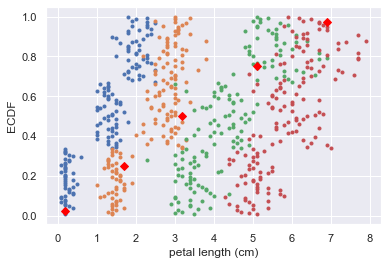

In [125]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()


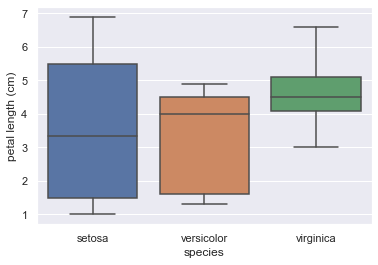

In [126]:
# Create box plot with Seaborn's default settings
sns.boxplot(x='species',y='petal length (cm)',data=df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()



In [127]:
# Array of differences to mean: differences
differences = versicolor_petal_length-np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)


# Print the results
print(variance_explicit,variance_np)




3.896056416666667 3.896056416666667


In [130]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))
print(df.head)

1.9738430577598278
1.9738430577598278
<bound method NDFrame.head of      index  sepal length (cm)  sepal width (cm)  petal length (cm)  \
0        0                5.1               3.5                1.4   
1        1                4.9               3.0                1.4   
2        2                4.7               3.2                1.3   
3        3                4.6               3.1                1.5   
4        4                5.0               3.6                1.4   
..     ...                ...               ...                ...   
145    145                6.7               3.0                5.2   
146    146                6.3               2.5                5.0   
147    147                6.5               3.0                5.2   
148    148                6.2               3.4                5.4   
149    149                5.9               3.0                5.1   

     petal width (cm) species  
0                 0.2  setosa  
1                 0.2  seto

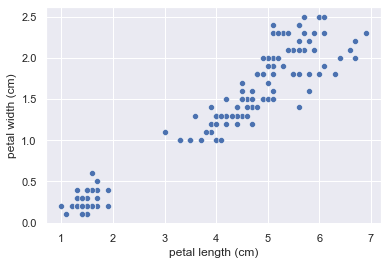

In [131]:
 
# Make a scatter plot
sns.scatterplot(data=df, x= 'petal length (cm)',y='petal width (cm)')

# Label the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


# Show the result
plt.show()

In [133]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(df['petal length (cm)'],df['petal width (cm)'])

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov=covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[3.11627785 1.2956094 ]
 [1.2956094  0.58100626]]
1.2956093959731547


In [142]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r=pearson_r(df['petal length (cm)'],df['petal width (cm)'])
# Print the result
print(r)

0.9628654314027961


# Probabilistic logic and statistical inference 
- statistical inference:
  1. to draw probabilistic conclusions about what we might expect if we collected the same data again
  2. to draw actionable conclusions from data
  3. to draw more general conclusions from relatively few data or observations
- Random number generators and hacker statistics
  1. Hacker statistics
     - uses simulated repeated measurement to compute probabilities >> games of chance
     - Bernoulli trials : an experiment with 2 result (True or False)
     - import numpy as np
     - rng = np.random. default_rng()
   2. random number seed
     - integer fed into random number generating algorithm
     - manually seed random number generator (only) if you need reproducibility
     - specified using rng = np.random.default_rng(seed)
       
   3. simulating 4 coin flips
     - n_all_heads = 0
     - for _ in range(10000):
     - heads = np.random.random(size=4) <0.5
     - n_heads = np.sum(heads)
     - if n_heads == 4:
     - n_all_heads +=1
     - n_all_heads/10000
       
  4. Hacker stats probabilites
     - determine how to simulate data
     - simulate many many times
     - probability is approximately fraction of trials with the outome of interest
     


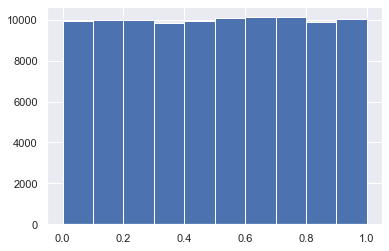

In [143]:
# Instantiate and seed the random number generator
rng = np.random.default_rng(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = rng.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()


In [170]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = rng.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

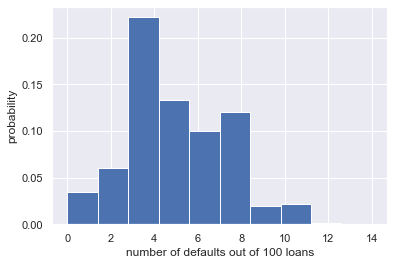

In [171]:
# Instantiate and seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults =np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, density=True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

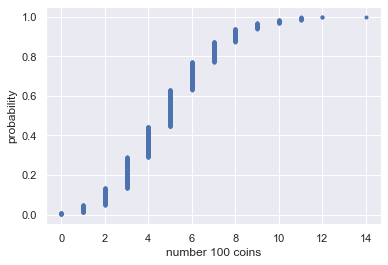

Probability of losing money = 0.033


In [174]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('number 100 coins')
plt.ylabel('probability') 

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >=10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


# Probability distributions and stories : The binomial distribution 
- probability mass function (PMF)
- the set of probabilities of discrete outcomes
- Binomial distribution : the story
  1. The number r of successes in n Bernoulli trials with probability p of success, is Binomially distributed
  2. The number r of heads in 4 coin flips with probability 0.5 of heads, is Binomially distributed
  3. rng.binomial(4,0.5)
  4. rng.binomial(60,0.1,size=10000)
  5. n=60, p=0.1
- visualize
  1. import matplotlib.pyplot as plt
  2. import seaborn as sns
  3. sns.set()
  4. x,y = ecdf(sample)
  5. plt.plot(x,y, marker='.', linestyle='none')
  6. plt.margins(0.02)
  7. plt.xlabel('number of successes')
  8. plt.ylabel('cdf')
  9. plt.show() 

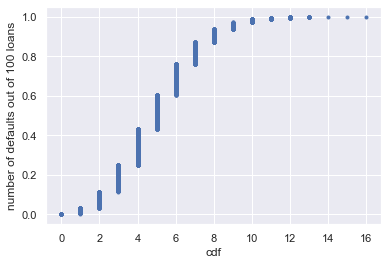

In [175]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = rng.binomial(100,0.05,size=10000)

# Compute CDF: x, y
x,y = ecdf(n_defaults)

# Plot the CDF with axis labels
plt.plot(x, y,marker= '.',linestyle='none')
plt.xlabel('cdf')
plt.ylabel('number of defaults out of 100 loans')

# Show the plot
plt.show()# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = illiteracy
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()



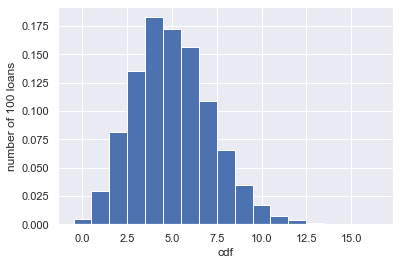

In [176]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
plt.hist(n_defaults, density=True, bins=bins)

# Label axes
plt.xlabel('cdf')
plt.ylabel('number of 100 loans')

# Show the plot
plt.show()

Poisson process and the poisson distribution 
- The timing of the next event is completely independent of when the previous event happened
- e.g
  1. natural births in a given hospital
  2. hits on a website during a given hour
  3. meteor strikes
  4. molecular collisions in a gas
-  The number r of arrivals of a Poisson process in a given time interval with average rate of lambda arrivals per interval is Poisson distributed
-  The number r of hits on a website in one hour with average hit rate of 6 hits per hour is Poisson distributed
-  Limit of the binomial distribution for low probability of success and large number of trials
-  to calculate
-  1. samples = rng.poisson(6, size =10000) 

In [182]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson=rng.poisson(10,size=10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(0,3):
    samples_binomial = rng.binomial(n[i],p[i],size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      10.002 3.1954962055993743
n = 20 Binom: 9.9878 2.2457184062121414
n = 100 Binom: 9.9874 2.9715048780037363
n = 1000 Binom: 10.0186 3.1262204080966525


When we have rare events(low p, high n). Poisson == Binomial distribution

In [183]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = rng.poisson(251/115,size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


Probability of seven or more no-hitters: 0.0074


# Probability density functions(PDF)
- Continuous variables
  - also have probability distribution
  - e.g measured speed of light
- PDF is continuous analog to the PMF (probability mass function)
- Mathematical description of the relative likelihood of observing a value of a continuous variable
- Cumulative distribution function : cumulative probability of normal distribution 

# Introduction to the normal distribution 
- Describes a continuous variable whose PDF has a single symmetric peak
- mean == peak, std how wide the peak is
- to compute CDF
  1. import numpy as np
  2. samples = rng.normal(np.mean(michelson_speed_of_light), np.std(michelson_speed_of_light), size=10000)
  3. x,y = ecdf(michelson_speed_of_light)
  4. x_theor, y_theor = ecdf(samples)
  5. visualize
     - import matplotlib.pyplot as plt
     - import seaborn as sns
     - sns.set()
     - plt.plot(x_theor, y_theor)
     - plt.plot(x,y,marker=',', linestyle='none_
     - plt.xlabel('speed oflight')
     - plt.ylabel('cdf')
     - plt.show()
- The normal distributionL Properties and warnings
  1. The gaussian distribution
  2. to check whether the data is distributed please check ECDF vs Theoterically normal CDF
  3. The lightness of tails , outliers extremely unlikely 

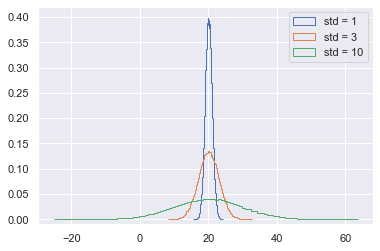

In [195]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1= rng.normal(20,1, size=100000)
samples_std3= rng.normal(20,3, size=100000)
samples_std10= rng.normal(20,10, size=100000)



# Make histograms
plt.hist(samples_std1,density=True, histtype='step', bins = 100)
plt.hist(samples_std3,density=True, histtype='step', bins = 100)
plt.hist(samples_std10,density=True, histtype='step', bins = 100)



# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


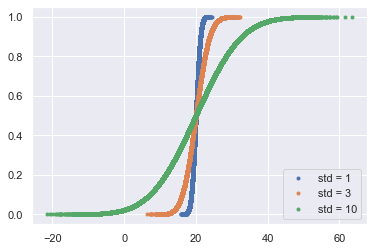

In [185]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)



# Plot CDFs
plt.plot(x_std1, y_std1, marker='.',linestyle='none')
plt.plot(x_std3, y_std3, marker='.',linestyle='none')
plt.plot(x_std10, y_std10, marker='.',linestyle='none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


In [215]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])

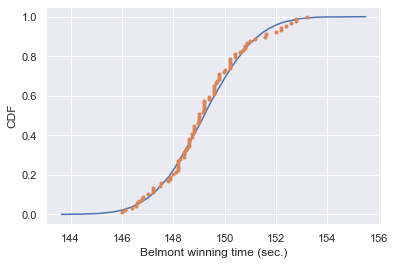

In [216]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma =np.std(belmont_no_outliers)


# Sample out of a normal distribution with this mu and sigma: samples
samples = rng.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y= ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()



In [223]:
# Take a million samples out of the Normal distribution: samples
samples = rng.normal(mu, sigma, size=1000000)

# Compute the fraction that are <= 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000637


# The Exponential distribution 
- The waiting time between arrivals of a Poisson process is Exponentially distributed. Key WORD is BETWEEEEENNNN 
- e.g nuclear incidents:
- how to calculate exponential inter-incident times
  1. mean = np.mean(inter_times)
  2. sample = rng.exponential(mean, size=10000)
  3. x,y= ecdf(inter_times)
  4. x_theor, y_theor = ecdf(samples) 

In [224]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = rng.exponential(tau1, size=size)

    # Draw samples out of second exponential distribution: t2
    t2 = rng.exponential(tau2, size=size)

    return t1 + t2

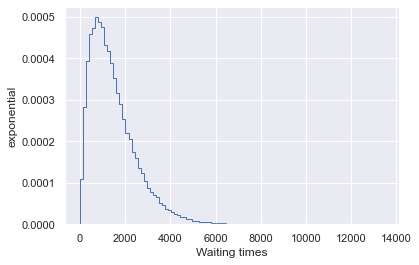

In [226]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764,715,size=100000)

# Make the histogram
plt.hist(waiting_times, bins=100, density = True, histtype='step')


# Label axes
plt.xlabel('Waiting times')
plt.ylabel('exponential')

# Show the plot
plt.show()


# Checking normality in continuous data 
1. import numpy as np
2. import matplotlib.pyplot as plt
3. mean=np.mean(x)
4. std = np.std(x)
5. samples = np.random.sample(mean,std,size=1000)

- Optimal parameters: parameter values that bring the model in closest agreement with the data
- packages to do statistical inference
  1. scipy.stats
  2. statsmodels
  3. numpy 

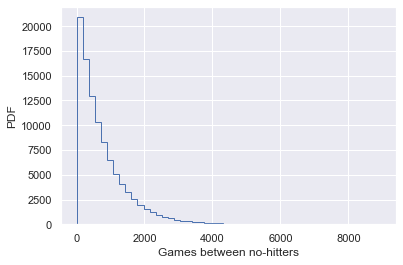

In [230]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50,  histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


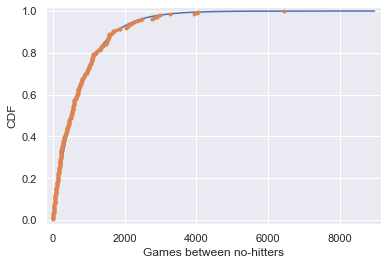

In [231]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

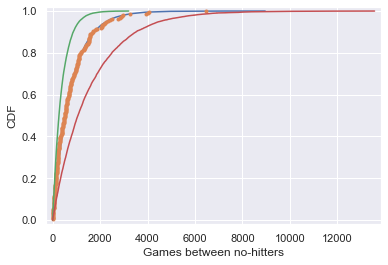

In [235]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2,10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2,10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

# Linear Regression by least squares 
- slope : how steep the line is
- intercept : when the line cross the y axis while the y == 0
- least squares: the process of finding the parameters for which the sum of the squares of the residuals is minimal
- how to calculate least squares:
  1. np.polyfit()
  2. slope, intercept = np.polyfit(x, y, 1(for linear function==1))


In [236]:
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])

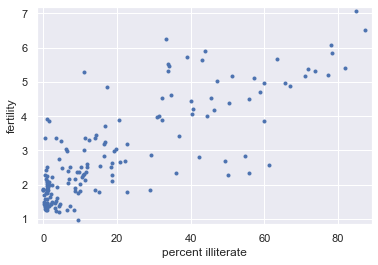

0.8041324026815341


In [238]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy , fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))


slope = 0.04979854809063418 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


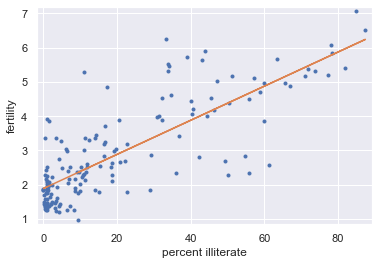

In [239]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy,fertility,1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = illiteracy
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


slope = 0.04979854809063418 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


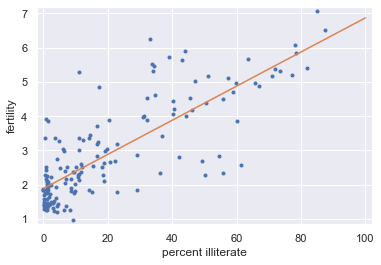

In [240]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()
